# Customer Churn Analysis - Ecommerce Retail Brand

Customer churn in the context of an ecommerce retail client refers to the phenomenon where customers stop making purchases or engaging with the online platform. It signifies the rate at which customers discontinue their relationship with the business, often transitioning to competitors or simply ceasing their transactions. Understanding and managing customer churn is crucial for businesses, as it helps identify areas for improvement, implement targeted retention strategies, and enhance overall customer satisfaction and loyalty.

I conducted a comprehensive analysis of an ecommerce dataset sourced from Kaggle, leveraging SQL queries to unearth insights and answer self-generated business questions. Utilizing various visualization tools including Matplotlib, Seaborn, and Plotly, I not only provided meaningful visual representations but also derived actionable recommendations based on the findings. The analysis delved into customer behavior, preferences, and satisfaction, while the self-formulated business questions allowed for a deeper understanding of the dataset, enhancing the overall strategic decision-making process.

## Insights:

* **Churn Rate and Sample Size**: The dataset includes 5,630 customers, providing a substantial sample size for analysis.

* **Overall Churn Rate**: The overall churn rate is 16.84%, indicating significant customer attrition.

* **Device Preference:** Customers who prefer logging in with a computer have slightly higher churn rates compared to phone users, suggesting different usage patterns and preferences.

* **City Tiers:** Tier 1 cities have lower churn rates than Tier 2 and Tier 3 cities, possibly due to competition and customer preferences.

* **Proximity Impact:** Proximity to the warehouse affects churn rates, with closer customers showing lower churn, highlighting the importance of optimizing logistics and delivery strategies.

* **Payment Mode Influence:** "Cash on Delivery" and "E-wallet" payment modes have higher churn rates, while "Credit Card" and "Debit Card" have lower churn rates, indicating the influence of payment preferences on churn.

* **Customer Tenure:** Longer tenure is associated with lower churn rates, emphasizing the need for building customer loyalty early on.

* **Gender and Churn:** Male customers have slightly higher churn rates than female customers, although the difference is minimal.

* **Order Category Impact:** "Mobile Phone" order category has the highest churn rate, while "Grocery" has the lowest, indicating the importance of tailored retention strategies for specific categories.

* **Customer Satisfaction:** Highly satisfied customers (rating 5) have a relatively higher churn rate, highlighting the need for proactive retention strategies at all satisfaction levels.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Load Excel data into a DataFrame
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')

# Create an SQLite database and load data into it
engine = create_engine('sqlite:///ecommerce.db')  # Replace 'ecommerce.db' with your desired database name
df.to_sql('ecom_data', engine, index=False)




5630

In [3]:
import sqlite3
# Connect to the SQLite database
conn = sqlite3.connect('ecommerce.db')  # Replace 'your_database.db' with your database file name

# Create a cursor object
cursor = conn.cursor()


In [4]:
# Write and execute an SQL query
cursor.execute("SELECT * FROM ecom_data LIMIT 5")

# Fetch the results
results = cursor.fetchall()

# Display the results
for row in results:
    print(row)


(50001, 1, 4.0, 'Mobile Phone', 3, 6.0, 'Debit Card', 'Female', 3.0, 3, 'Laptop & Accessory', 2, 'Single', 9, 1, 11.0, 1.0, 1.0, 5.0, 159.93)
(50002, 1, None, 'Phone', 1, 8.0, 'UPI', 'Male', 3.0, 4, 'Mobile', 3, 'Single', 7, 1, 15.0, 0.0, 1.0, 0.0, 120.9)
(50003, 1, None, 'Phone', 1, 30.0, 'Debit Card', 'Male', 2.0, 4, 'Mobile', 3, 'Single', 6, 1, 14.0, 0.0, 1.0, 3.0, 120.28)
(50004, 1, 0.0, 'Phone', 3, 15.0, 'Debit Card', 'Male', 2.0, 4, 'Laptop & Accessory', 5, 'Single', 8, 0, 23.0, 0.0, 1.0, 3.0, 134.07)
(50005, 1, 0.0, 'Phone', 1, 12.0, 'CC', 'Male', None, 3, 'Mobile', 5, 'Single', 3, 0, 11.0, 1.0, 1.0, 3.0, 129.6)


In [5]:
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## What is the Overall Customer Churn Rate ?
* Total Number of Customers : 5630
* Total Number of Churned Customers: 948
* Churn Rate 16 %

(0, 4682)
(1, 948)


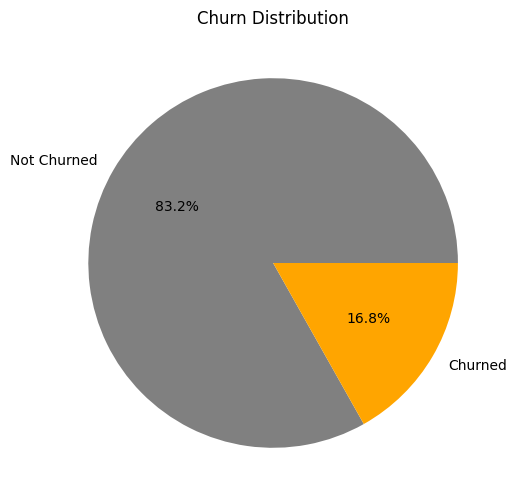

(5630, 16)


In [6]:
import matplotlib.pyplot as plt

cursor.execute('''SELECT Churn, COUNT(CustomerID) AS TotalCustomers FROM ecom_data
GROUP BY Churn; ''')
               
# Fetch the results
results = cursor.fetchall()

for row in results:
    print(row)

# Extract the counts and labels
counts = [item[1] for item in results]
labels = ['Not Churned' if item[0] == 0 else 'Churned' for item in results]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['grey', 'orange'])
plt.title('Churn Distribution')
plt.show()
    
cursor.execute('''SELECT COUNT(CustomerID), (SUM(CASE WHEN Churn = '1' THEN 1 ELSE 0 END)*100)/Count(CustomerID) as Churnrate
FROM ecom_data''')
               
# Fetch the results
results = cursor.fetchall()

for row in results:
    print(row)


## How does the Churn rate vary based on the different login devices ?
* Computer - 19.83 % churn rate
* Mobile Phone - 12.59 % churn rate
* Phone - 22.42 % churn rate

('Computer', 1634, 324, 19.83)
('Mobile Phone', 2765, 348, 12.59)
('Phone', 1231, 276, 22.42)


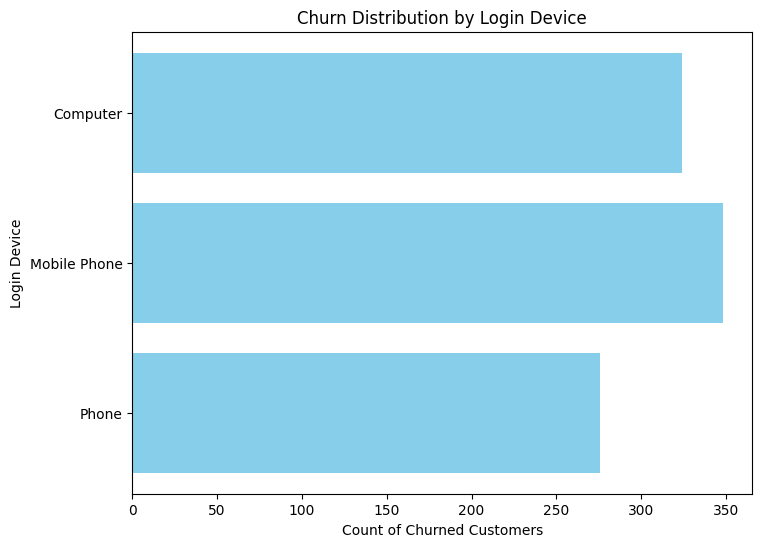

In [7]:
cursor.execute('''SELECT preferredlogindevice, 
        COUNT(*) AS TotalCustomers,
        SUM(churn) AS ChurnedCustomers,
        ROUND(SUM (churn) * 1.0 / COUNT(*) * 100,2)  AS ChurnRate
FROM ecom_data
GROUP BY preferredlogindevice'''
 )
               
# Fetch the results
results = cursor.fetchall()

for row in results:
    print(row)
    
# Extract the counts and labels
counts = [item[2] for item in results]
labels = [item[0] for item in results]

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Count of Churned Customers')
plt.ylabel('Login Device')
plt.title('Churn Distribution by Login Device')
plt.gca().invert_yaxis()  # Invert y-axis to display the top category at the top
plt.show()

## What is the distribution of Customers across different city tiers ?
* City Tier 1(Major Metropolitan Areas with good Economic Development - 14.51 % churn rate)
* City Tier 2(Secondary Urban Areas with moderate Development - 19.83 % churn rate)
* City Tier 3(Small Towns or Cities with less population - 21.37 % churn rate)

(1, 3666, 532, 14.51)
(2, 242, 48, 19.83)
(3, 1722, 368, 21.37)


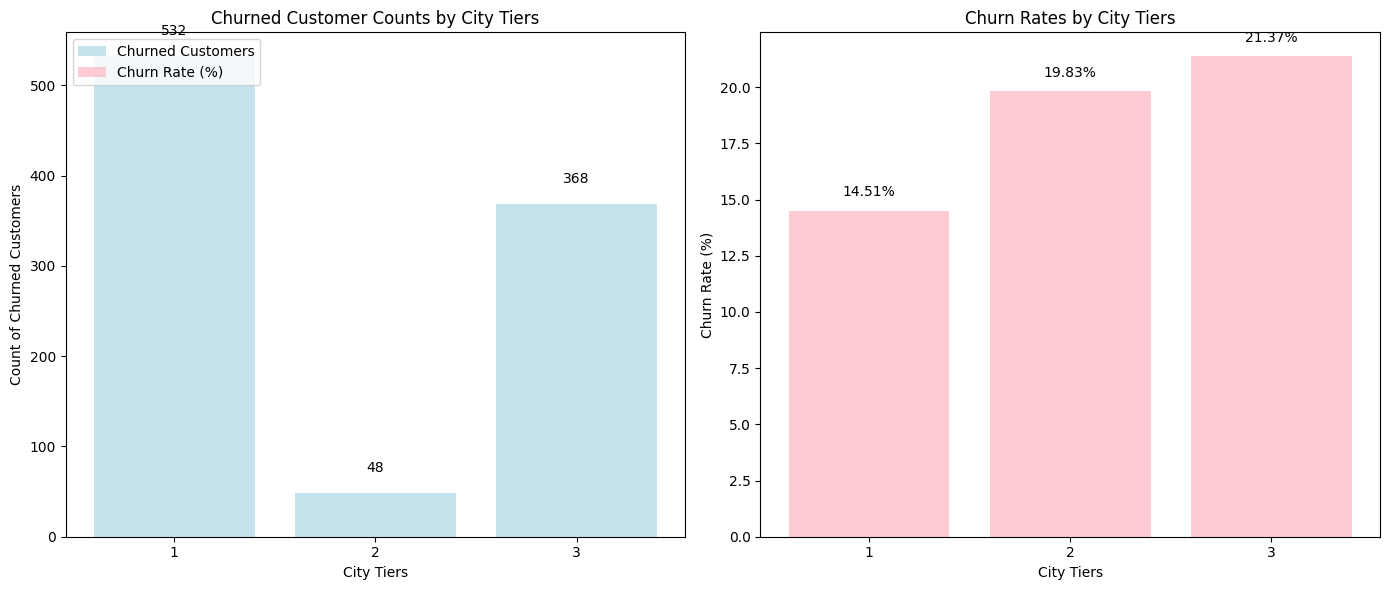

In [8]:
cursor.execute('''SELECT citytier, 
        COUNT(*) AS TotalCustomers,
        SUM(churn) AS ChurnedCustomers,
        ROUND(SUM (churn) * 1.0 / COUNT(*) * 100,2)  AS ChurnRate
FROM ecom_data
GROUP BY citytier'''
 )
               
# Fetch the results
results = cursor.fetchall()

for row in results:
    print(row)
    
tiers = [item[0] for item in results]
churned_counts = [item[2] for item in results]
churn_rates = [item[3] for item in results]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot churned customer counts in the first subplot
bar1 = ax1.bar(tiers, churned_counts, color='lightblue', alpha=0.7, label='Churned Customers')
ax1.set_xlabel('City Tiers')
ax1.set_ylabel('Count of Churned Customers')
ax1.set_title('Churned Customer Counts by City Tiers')

# Add labels with values on top of the bars in the first subplot
for i, v in enumerate(churned_counts):
    ax1.text(i + 1, v + 20, str(v), ha='center', va='bottom')

# Plot churn rates in the second subplot
bar2 = ax2.bar(tiers, churn_rates, color='lightpink', alpha=0.7, label='Churn Rate (%)')
ax2.set_xlabel('City Tiers')
ax2.set_ylabel('Churn Rate (%)')
ax2.set_title('Churn Rates by City Tiers')

# Add labels with values on top of the churn rate bars in the second subplot
for i, v in enumerate(churn_rates):
    ax2.text(i + 1, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

# Combine legend for both subplots
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

# Set x-axis ticks to match city tiers in both subplots
ax1.set_xticks(tiers)
ax2.set_xticks(tiers)

# Adjust subplot spacing
plt.tight_layout()

plt.show()

## Is there any correlation between Warehouse to Home Distance & Customer Churn
* Warehouse to Home Distance Ranges between 0 to 20 has the most number of Customer Churns

('0-10', 266)
('11-20', 324)
('21-30', 176)
('Above 30', 98)
('Unknown', 84)


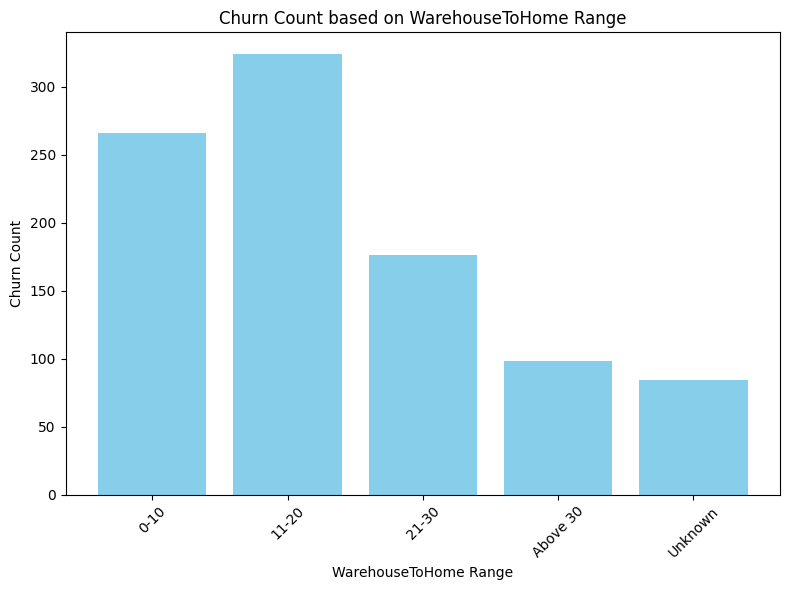

In [9]:
cursor.execute('''SELECT
    CASE
        WHEN WarehouseToHome >= 0 AND WarehouseToHome <= 10 THEN '0-10'
        WHEN WarehouseToHome >= 11 AND WarehouseToHome <= 20 THEN '11-20'
        WHEN WarehouseToHome >= 21 AND WarehouseToHome <= 30 THEN '21-30'
        WHEN WarehouseToHome > 30 THEN 'Above 30'
        ELSE 'Unknown'
    END AS ChurnRange,
    COUNT(*) AS ChurnCount
FROM
    ecom_data
WHERE Churn = 1
GROUP BY
    ChurnRange
ORDER BY
    ChurnRange;''')

results = cursor.fetchall()

for row in results:
    print(row)

WarehousetoHomeRange = [item[0] for item in results]
churned_counts = [item[1] for item in results]

plt.figure(figsize=(8, 6))
plt.bar(WarehousetoHomeRange, churned_counts, color='skyblue')
plt.xlabel('WarehouseToHome Range')
plt.ylabel('Churn Count')
plt.title('Churn Count based on WarehouseToHome Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## What is the most preferred payment method among the Churned Customers ?
* Cash on Delivery Payment has the highest Churn rate percentage among all the payment types.

[('COD', 365, 105, 28.767123287671232), ('E wallet', 614, 140, 22.80130293159609), ('CC', 273, 59, 21.611721611721613), ('UPI', 414, 72, 17.391304347826086), ('Cash on Delivery', 149, 23, 15.436241610738255), ('Debit Card', 2314, 356, 15.384615384615385), ('Credit Card', 1501, 193, 12.858094603597603)]


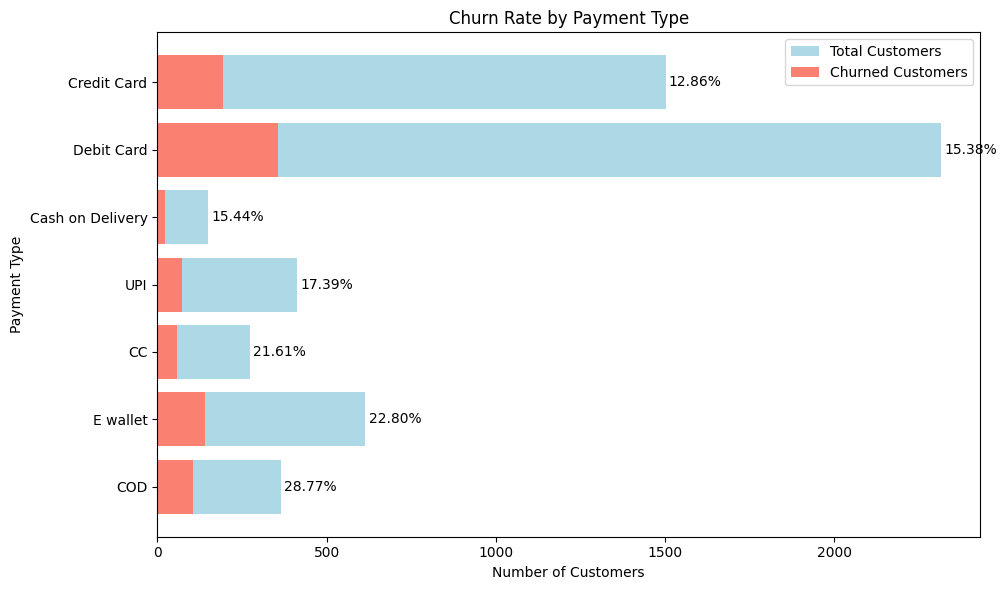

In [10]:
cursor.execute('''SELECT preferredpaymentmode,
       COUNT(*) AS TotalCustomer,
       SUM(Churn) AS CustomerChurn,
       CAST(SUM(Churn) * 1.0 /COUNT(*) * 100 AS DECIMAL(10,2)) AS Churnrate
FROM ecom_data
GROUP BY preferredpaymentmode
ORDER BY Churnrate DESC''')

results = cursor.fetchall()
print(results)

payment_types = [item[0] for item in results]
total_customers = [item[1] for item in results]
customer_churn = [item[2] for item in results]
churn_rates = [item[3] for item in results]

plt.figure(figsize=(10, 6))
plt.barh(payment_types, total_customers, color='lightblue', label='Total Customers')
plt.barh(payment_types, customer_churn, color='salmon', label='Churned Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Type')
plt.title('Churn Rate by Payment Type')
plt.legend()
plt.tight_layout()

# Annotate the bars with churn rates
for i, rate in enumerate(churn_rates):
    plt.text(total_customers[i] + 10, i, f'{rate:.2f}%', va='center')

plt.show()

## What is the typical tenure for churned customers? 
* Creating a new column "Tenure Range" based on the above calculation to find out the count of churned customers based on the Tenure

[todo]
1. use symbol rather than words. and can do better grouping

In [11]:
cursor.execute('''ALTER TABLE ecom_data
                  ADD COLUMN TenureRange NVARCHAR(50)''')

results = cursor.fetchall()

cursor.execute('''UPDATE ecom_data
                  SET TenureRange =
                      CASE 
                          WHEN tenure <= 6 THEN '6 Months'
                          WHEN tenure > 6 AND tenure <= 12 THEN '1 Year'
                          WHEN tenure > 12 AND tenure <= 24 THEN '2 Years'
                          WHEN tenure > 24 THEN 'more than 2 years'
                      END''')

results = cursor.fetchall()

* Customers who has been in the Tenure Range of 6 months and less has more churn rate
* Customers who has stayed for more than 2 years has 0 churn rate

[('6 Months', 2150, 697, 32.41860465116279), (None, 264, 81, 30.681818181818183), ('2 Years', 1467, 95, 6.4758009543285615), ('1 Year', 1320, 75, 5.681818181818182), ('more than 2 years', 429, 0, 0.0)]


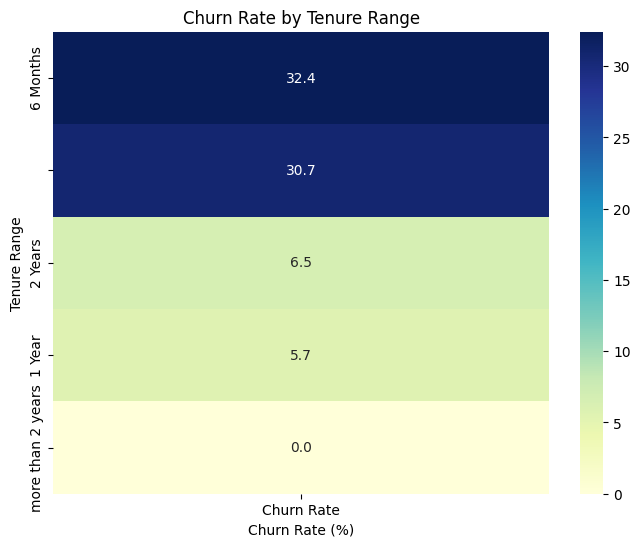

In [12]:
import seaborn as sns

cursor.execute('''SELECT TenureRange,
       COUNT(*) AS TotalCustomer,
       SUM(Churn) AS CustomerChurn,
       CAST(SUM(Churn) * 1.0 /COUNT(*) * 100 AS DECIMAL(10,2)) AS Churnrate
FROM ecom_data
GROUP BY TenureRange
ORDER BY Churnrate DESC''')

results = cursor.fetchall()
print(results)

tenure_ranges = [item[0] for item in results]
churn_rates = [item[3] for item in results]

# Create a dictionary from the data
data = {'Tenure Range': tenure_ranges, 'Churn Rate': churn_rates}

# Create a DataFrame from the dictionary
import pandas as pd
df = pd.DataFrame(data)

# Create a heat map using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(data=df.set_index('Tenure Range'), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Churn Rate by Tenure Range')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Tenure Range')
plt.show()

## Is there any difference in churn rate between male and female customers? 
* There is a slight difference in churn rates between genders. Men have a churn rate of 17 percent, while women have a churn rate of 14 percent.

[('Male', 3384, 600, 17.73049645390071), ('Female', 2246, 348, 15.49421193232413)]


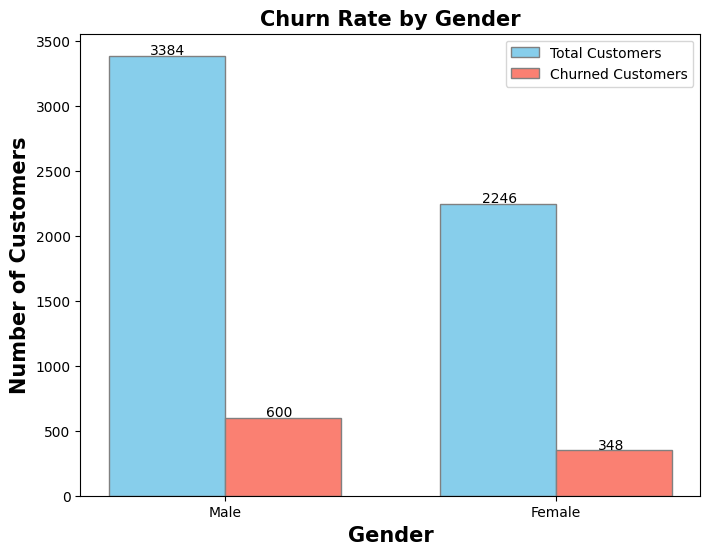

In [13]:
cursor.execute('''SELECT gender,
       COUNT(*) AS TotalCustomer,
       SUM(Churn) AS CustomerChurn,
       CAST(SUM(Churn) * 1.0 /COUNT(*) * 100 AS DECIMAL(10,2)) AS Churnrate
FROM ecom_data
GROUP BY gender
ORDER BY Churnrate DESC''')

results = cursor.fetchall()
print(results)

churn_rates = [item[3] for item in results]
genders = [item[0] for item in results]
total_customers = [item[1] for item in results]
churned_customers = [item[2] for item in results]

# Set the bar width
bar_width = 0.35

# Set the positions of bars on X-axis for the two groups
r1 = np.arange(len(total_customers))
r2 = [x + bar_width for x in r1]

# Create a grouped bar chart
plt.figure(figsize=(8, 6))
plt.bar(r1, total_customers, color='skyblue', width=bar_width, edgecolor='grey', label='Total Customers')
plt.bar(r2, churned_customers, color='salmon', width=bar_width, edgecolor='grey', label='Churned Customers')

# Add labels, title, and custom x-axis tick labels
plt.xlabel('Gender', fontweight='bold', fontsize=15)
plt.ylabel('Number of Customers', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width / 2 for r in range(len(total_customers))], genders)
plt.title('Churn Rate by Gender', fontweight='bold', fontsize=15)
plt.legend()

# Display the data values on top of the bars
for i in range(len(total_customers)):
    plt.text(r1[i] - 0.05, total_customers[i] + 10, str(total_customers[i]), color='black')
    plt.text(r2[i] - 0.05, churned_customers[i] + 10, str(churned_customers[i]), color='black')

plt.show()

## How does the average time spent on the app differ for churned and non-churned customers?
* Churned and Existing Customers spend almost same time on the app. So we cannot use this column to predict the Churn reason.

In [14]:
cursor.execute('''SELECT Churn, avg(HourSpendOnApp) AS AverageHourSpentonApp
FROM ecom_data
GROUP BY Churn''')
results = cursor.fetchall()
print(results)

[(0, 2.9255295429208474), (1, 2.9617977528089887)]


## Does the number of registered devices impact the likelihood of churn? 
* Surprisingly, Customers who has 6 registered devices has 34 percent churn rate

[(6, 162, 56, 34.5679012345679), (5, 881, 198, 22.474460839954595), (4, 2377, 392, 16.491375683634836), (3, 1699, 254, 14.949970570924073), (2, 276, 26, 9.420289855072465), (1, 235, 22, 9.361702127659575)]


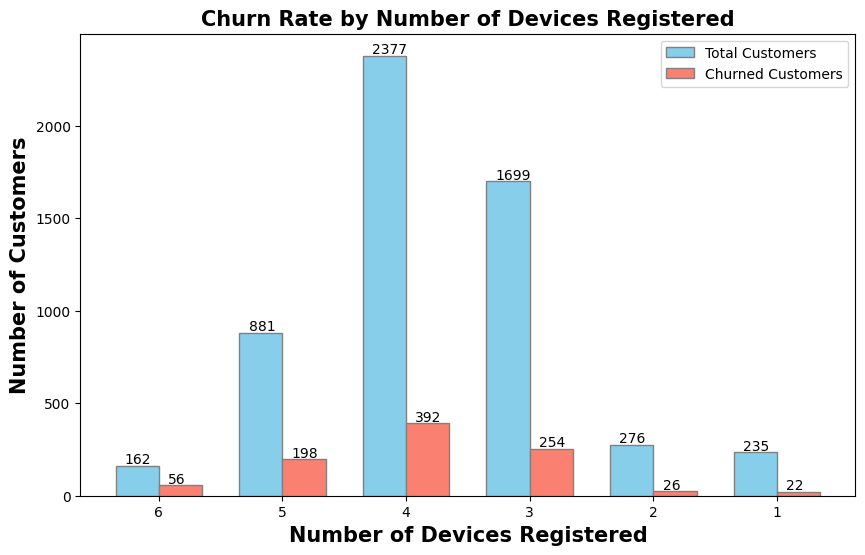

In [15]:
cursor.execute('''SELECT NumberofDeviceRegistered,
       COUNT(*) AS TotalCustomer,
       SUM(Churn) AS CustomerChurn,
       CAST(SUM(Churn) * 1.0 /COUNT(*) * 100 AS DECIMAL(10,2)) AS Churnrate
FROM ecom_data
GROUP BY NumberofDeviceRegistered
ORDER BY Churnrate DESC''')
results = cursor.fetchall()
print(results)

device_counts = [item[0] for item in results]
total_customers = [item[1] for item in results]
churned_customers = [item[2] for item in results]

# Set the bar width
bar_width = 0.35

# Set the positions of bars on X-axis for the two groups
r1 = np.arange(len(total_customers))
r2 = [x + bar_width for x in r1]

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, total_customers, color='skyblue', width=bar_width, edgecolor='grey', label='Total Customers')
plt.bar(r2, churned_customers, color='salmon', width=bar_width, edgecolor='grey', label='Churned Customers')

# Add labels, title, and custom x-axis tick labels
plt.xlabel('Number of Devices Registered', fontweight='bold', fontsize=15)
plt.ylabel('Number of Customers', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width / 2 for r in range(len(total_customers))], device_counts)
plt.title('Churn Rate by Number of Devices Registered', fontweight='bold', fontsize=15)
plt.legend()

# Display the data values on top of the bars
for i in range(len(total_customers)):
    plt.text(r1[i] - 0.1, total_customers[i] + 10, str(total_customers[i]), color='black')
    plt.text(r2[i] - 0.1, churned_customers[i] + 10, str(churned_customers[i]), color='black')

plt.show()

## Which order category is most preferred among churned customers? 


* Churn rate is high among the customers who uses Mobile

[('Mobile Phone', 1271, 350, 27.53737214791503), ('Mobile', 809, 220, 27.19406674907293), ('Fashion', 826, 128, 15.49636803874092), ('Laptop & Accessory', 2050, 210, 10.24390243902439), ('Others', 264, 20, 7.575757575757576), ('Grocery', 410, 20, 4.878048780487805)]


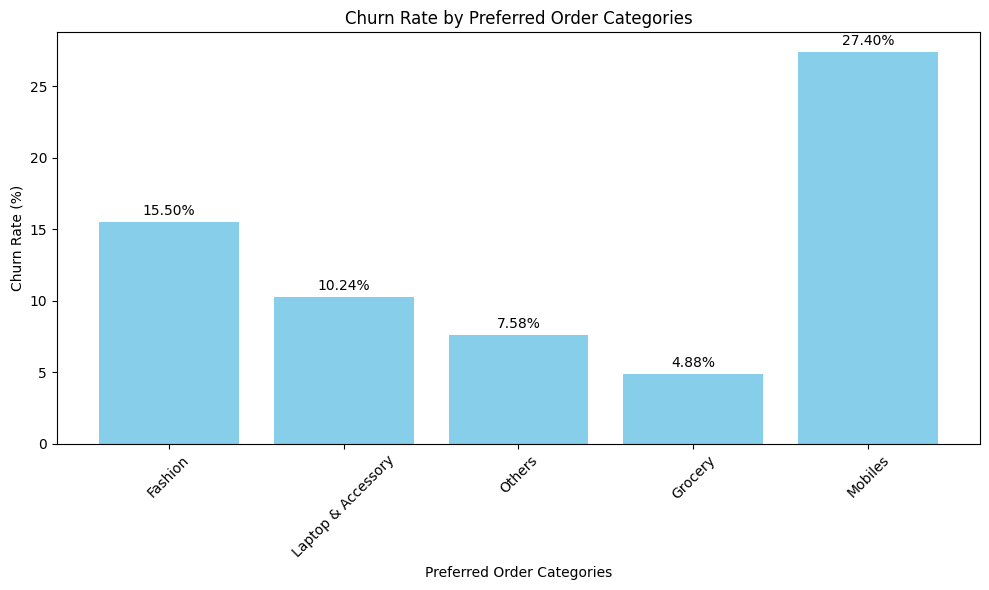

In [38]:
cursor.execute('''SELECT preferedordercat,
       COUNT(*) AS TotalCustomer,
       SUM(Churn) AS CustomerChurn,
       CAST(SUM(Churn) * 1.0 /COUNT(*) * 100 AS DECIMAL(10,2)) AS Churnrate
FROM ecom_data
GROUP BY preferedordercat
ORDER BY Churnrate DESC''')
results = cursor.fetchall()

print(results)


combined_results = []
mobile_combined_total = 0
mobile_combined_churn = 0
for item in results:
    category, total_customers, churned_customers, churn_rate = item
    if category == 'Mobile Phone' or category == 'Mobile':
        mobile_combined_total += total_customers
        mobile_combined_churn += churned_customers
    else:
        combined_results.append(item)

# Add the combined Mobile Phone and Mobile category to the new results list
combined_results.append(('Mobiles', mobile_combined_total, mobile_combined_churn, 
                        mobile_combined_churn * 100.0 / mobile_combined_total))

# Extract data for plotting
order_categories = [item[0] for item in combined_results]
churn_rates = [item[3] for item in combined_results]

plt.figure(figsize=(10, 6))
plt.bar(order_categories, churn_rates, color='skyblue')
plt.xlabel('Preferred Order Categories')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Preferred Order Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Adding churn rate values inside the bars
for i, rate in enumerate(churn_rates):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center')

plt.show()




## Is there any relationship between customer satisfaction scores and churn?

* Surprisingly customers with high satisfactor score tend to churn a lot.

[(5, 1108, 264, 23.826714801444044), (3, 1698, 292, 17.196702002355714), (4, 1074, 184, 17.13221601489758), (2, 586, 74, 12.627986348122866), (1, 1164, 134, 11.512027491408935)]


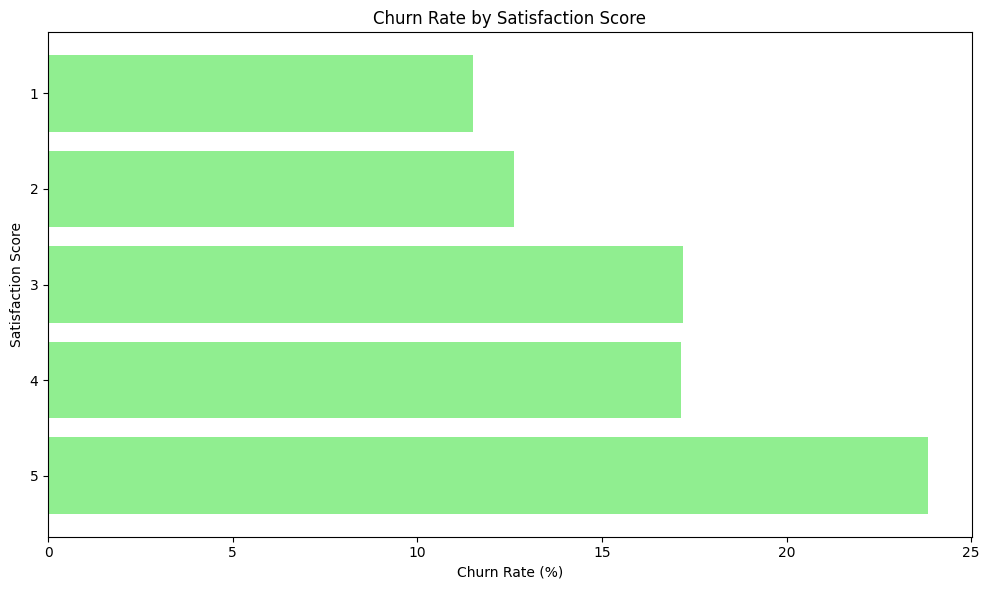

In [44]:
cursor.execute("""SELECT satisfactionscore,
       COUNT(*) AS TotalCustomer,
       SUM(Churn) AS CustomerChurn,
       CAST(SUM(Churn) * 1.0 /COUNT(*) * 100 AS DECIMAL(10,2)) AS Churnrate
FROM ecom_data
GROUP BY satisfactionscore
ORDER BY Churnrate DESC """)
results = cursor.fetchall()

print(results)

satisfaction_scores = [item[0] for item in results]
churn_rates = [item[3] for item in results]

plt.figure(figsize=(10, 6))
plt.barh(satisfaction_scores, churn_rates, color='lightgreen')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Satisfaction Score')
plt.title('Churn Rate by Satisfaction Score')
plt.yticks(satisfaction_scores)  # Set y-ticks to match satisfaction scores
plt.gca().invert_yaxis()  # Invert y-axis to display higher satisfaction scores on top
plt.tight_layout()


plt.show()



## Do customer complaints influence churned behavior? 

* The customers who has registered more complaints has more churn rate.

[(1, 1604, 508, 31.67082294264339), (0, 4026, 440, 10.92896174863388)]


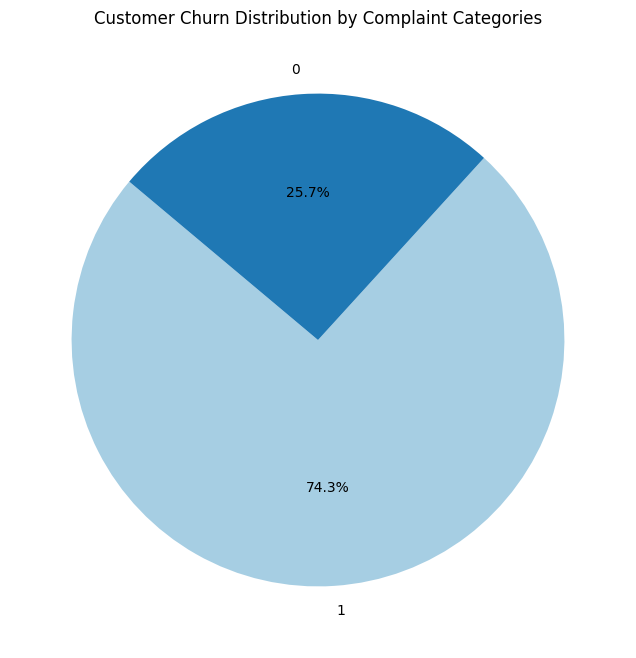

In [46]:
cursor.execute("""SELECT Complain,
       COUNT(*) AS TotalCustomer,
       SUM(Churn) AS CustomerChurn,
       CAST(SUM(Churn) * 1.0 /COUNT(*) * 100 AS DECIMAL(10,2)) AS Churnrate
FROM ecom_data
GROUP BY Complain
ORDER BY Churnrate DESC""")
results = cursor.fetchall()
print(results)

complaints = [item[0] for item in results]
churn_rates = [item[3] for item in results]

plt.figure(figsize=(8, 8))
plt.pie(churn_rates, labels=complaints, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Customer Churn Distribution by Complaint Categories')



plt.show()

In [32]:
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Recommendations:

* **Enhance Online Experience:** Improve user satisfaction for computer users by identifying and resolving issues, ensuring a smoother online journey.

* **Customize City-wise Strategies:** Tailor offerings to match customer preferences in different city tiers, creating targeted incentives for enhanced engagement.

* **Streamline Delivery Services:** Optimize logistics for faster deliveries and lower costs, focusing on convenience, especially for distant customers.

* **Simplify Payments:** Simplify payment processes, promoting secure options like Credit Cards and Debit Cards, while offering incentives for reliable transactions.

* **Effective Customer Support:** Address complaints promptly, showing commitment to resolving issues. Actively listen to feedback, making necessary improvements.

* **Category-specific Promotions:** Design exclusive offers for specific categories like "Mobile Phone," encouraging continued loyalty through discounts and rewards.

* **Consistent Device Experience:** Ensure a uniform experience across devices with features like cross-device syncing and personalized recommendations.

* **Engage Satisfied Customers:** Communicate regularly with happy customers through personalized messages, exclusive offers, and loyalty programs to maintain their loyalty.
